In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\jorda\Documents\studies\DScourse\CourseMaterials\Data\home-data-for-ml-course\train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Fill null values
null_cols = df.columns[df.isnull().sum() > 0]

df[null_cols].fillna(0, inplace=True)

C:\Users\jorda\AppData\Local\Temp\ipykernel_9344\2301417596.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[null_cols].fillna(0, inplace=True)


In [4]:
a = df.apply(lambda x: pd.to_numeric(x, errors='coerce')).isnull().sum()
well_behaved_cols = a[a == 0].index.drop('Id')

feature_cols = well_behaved_cols[:-1]
target_col = well_behaved_cols[-1]

In [5]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)

model.fit(df[feature_cols], df[target_col])

RandomForestRegressor(random_state=42)

In [6]:
model.score(df[feature_cols], df[target_col])

0.9798847573337272

In [7]:
a = df.apply(lambda x: pd.to_numeric(x, errors='coerce')).isnull().sum()
numeric_cols = a[a == 0].index.drop('Id')
categorical_cols = df.drop(null_cols, axis=1)
categorical_cols.drop('Id', axis=1, inplace=True)

<Axes: xlabel='YearBuilt', ylabel='Count'>

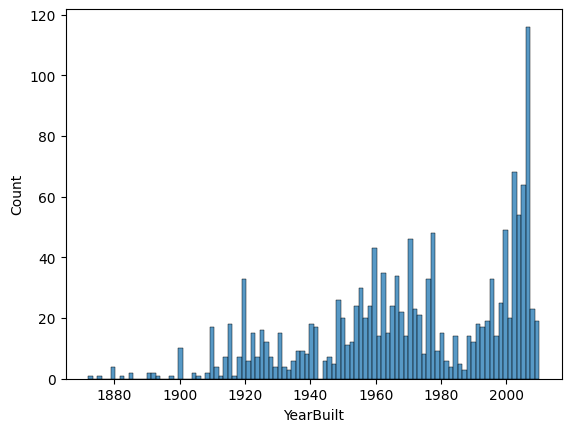

In [8]:
sns.histplot(data=df['YearBuilt'], bins=100)

In [15]:
df['year_built_bins'] = pd.cut(df['YearBuilt'], bins=8, labels=['> 1880', '1880-1900', '1900-1920', '1920-1940', '1940-1960', '1960-1980', '1980-2000', '2000 <'])

encoded_df = pd.get_dummies(data=df, columns=['year_built_bins'], drop_first=False)
encoded_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,SaleCondition,SalePrice,year_built_bins_> 1880,year_built_bins_1880-1900,year_built_bins_1900-1920,year_built_bins_1920-1940,year_built_bins_1940-1960,year_built_bins_1960-1980,year_built_bins_1980-2000,year_built_bins_2000 <
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,Normal,208500,False,False,False,False,False,False,False,True
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,Normal,181500,False,False,False,False,False,False,True,False
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,Normal,223500,False,False,False,False,False,False,False,True
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,Abnorml,140000,False,False,True,False,False,False,False,False
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,Normal,250000,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,Normal,175000,False,False,False,False,False,False,False,True
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,Normal,210000,False,False,False,False,False,False,True,False
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,Normal,266500,False,False,False,True,False,False,False,False
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,Normal,142125,False,False,False,False,True,False,False,False


In [19]:
df['year_built_quantile'] = pd.qcut(df['YearBuilt'], 10)
df['year_built_quantile'].value_counts()
quant_encoded_df = pd.get_dummies(data=df, columns=['year_built_quantile'], drop_first=False)
quant_encoded_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive